In [1]:
import pandas as pd
import numpy as np

In [2]:
pd.options.display.max_columns = None

In [3]:
data_uais = pd.read_csv("data/MoviesUAIS.csv")

In [4]:
data_kinopoisk = pd.read_csv("data/MoviesKinopoisk.csv")

In [9]:
data_kinopoisk = pd.read_csv("data/Movies_TOP20_since2015.csv")

In [5]:
data_google = pd.read_csv("data/google_serach_weeks.csv")

In [184]:
data_wordstat = pd.read_csv("data/Wordstat.csv")

In [6]:
data_google.columns = ["title_uais"] + list(data_google.columns[1:])

In [10]:
data_google[data_google.columns[1:]] = data_google[data_google.columns[1:]].fillna(
    data_google[data_google.columns[1:]].mean()
)

In [13]:
data_google.shape

(774, 10)

In [11]:
data = data_kinopoisk.set_index(data_kinopoisk.columns[0])\
    .join(data_uais.set_index(data_uais.columns[0]))

In [14]:
data = data\
    .replace('None', np.nan)\
    .replace('None :', np.nan)\
    .replace('{}', np.nan)\
    .replace('()', np.nan)

In [15]:
data = data[~data.index.duplicated()]

In [16]:
data = data.reset_index().rename({"index": "title_uais"}, axis=1)

In [17]:
data.shape

(1698, 47)

In [18]:
import datetime
import locale

In [19]:
locale.setlocale(locale.LC_TIME, "ru_RU")

'ru_RU'

In [20]:
data.head()

,title_uais,id,title,title_en,plot,year,countries,tagline,actors,directors,screenwriters,producers,operators,composers,art_direction_by,editing_by,genres,cast,budget,marketing,profit_usa,profit_russia,profit_world,audience,rating,votes,imdb_rating,imdb_votes,runtime,release,posters,trailers,youtube_ids,series,series_years,release_russia,release_world,viewers,budget.1,age_restr,release_week_rus,release_week_rus_matched_with_google,release_date_uais,magic_number,profit_uais,type_uais,age_restriction
0,#ВСЁ_ИСПРАВИТЬ!?!,927804,#ВСЕ_ИСПРАВИТЬ!?!,NaN,Беззаботные музыканты вдруг попадают в неожида...,2016,Россия,NaN,"Никита Киоссе, Владислав Рамм, Артём Пиндюра, ...",Антон Калинкин,"Антон Калинкин, Юрий Эпштейн, Артем Голиков","Антон Калинкин, Владимир Пономаренко, Сергей Н...",Святослав Булаковский,Константин Меладзе,"Константин Пахотин, Виктория Ефимова-Шестаковская",NaN,"драма, музыка, комедия",NaN,NaN,NaN,NaN,228960,NaN,NaN,3.634,1766,NaN,NaN,98,NaN,NaN,NaN,NaN,FALSE,NaN,28.4.2016,28.4.2016,NaN,68.8 тыс.,NaN,18-2016,56.0,NaN,111006916.0,15206808.84,Кино,«12+» для детей старше 12 лет
1,007: Спектр,678552,007: СПЕКТР,Spectre,Зашифрованное послание из неизвестного источни...,2015,"Великобритания, США",«The dead are alive»,"Дэниэл Крэйг, Кристоф Вальц, Леа Сейду, Рэйф Ф...",Сэм Мендес,"Джон Логан, Нил Пёрвис, Роберт Уэйд","Закария Алауи, Барбара Брокколи, Дэниэл Крэйг",Хойте Ван Хойтема,Томас Ньюман,"Деннис Гасснер, Эндрю Беннетт, Нил Кэллоу",Ли Смит,"боевик, триллер, приключения",NaN,245000000,NaN,200074609,12924561,880674609,NaN,6.552,91831,NaN,NaN,148,NaN,NaN,NaN,NaN,FALSE,NaN,6.11.2015,6.11.2015,NaN,$245 000 000,NaN,45-2015,30.0,Thu Jun 11 2015 00:00:00 GMT+0300 (MSK),121021715.0,706195.00,Кино,«16+» для детей старше 16 лет
2,1+1. Нарушая правила,977129,1+1. Нарушая правила,Inseparables,"Филиппе — богатому бизнесмену, прикованному к ...",2016,Аргентина,«La historia real de una amistad inesperada»,"Оскар Мартинес, Родриго Де ла Серна, Алехандра...",Маркос Карневале,"Маркос Карневале, Оливье Накаш, Эрик Толедано","Карлос Ментасти, Луис А. Скалелья, Аксель Куше...",Горацио Майра,NaN,"Грасиэла Фрагулья, Pablo Battaglia, Daiana Gon...",Луис Баррош,"драма, комедия",NaN,NaN,NaN,6258,21207,NaN,NaN,4.833,1163,6.2,594,108,NaN,NaN,NaN,NaN,FALSE,NaN,10.8.2017,10.8.2017,0,$6 258,NaN,32-2017,122.0,Thu Aug 10 2017 00:00:00 GMT+0300 (MSK),121014317.0,1123910.00,NaN,«16+» - для детей старше 16 лет
3,1+1: Голливудская история,596484,1+1: Голливудская история,The Upside,"Пентхаус в Нью Йорке, целый гараж коллекционны...",2018,США,«Одинокий миллиардер в поисках острых ощущений»,"Брайан Крэнстон, Кевин Харт, Николь Кидман, Эй...",Нил Бёргер,"Джон Хартмир, Эрик Толедано, Оливье Накаш","Тодд Блэк, Дэвид Дж. Блумфилд, Джейсон Блюменталь",Стюарт Драйбёрг,Роб Симонсен,"Марк Фридберг, Том Фролинг, Ким Дженнингс",Наоми Джерати,"драма, комедия",NaN,37500000,NaN,108252517,329437,125852517,NaN,6.014,8371,NaN,NaN,126,NaN,NaN,NaN,NaN,FALSE,NaN,8.9.2017,10.1.2019,NaN,$37 500 000,NaN,36-2017,126.0,NaN,NaN,NaN,NaN,NaN
4,100 вещей и ничего лишнего,1121377,100 вещей и ничего лишнего,100 Dinge,"Лучшие друзья Пауль и Тони, находясь буквально...",2018,Германия,NaN,"Флориан Давид Фиц, Маттиас Швайгхёфер, Мириам ...",Флориан Давид Фиц,Флориан Давид Фиц,"Дан Мааг, Дэниэль Зоннабенд, Антье Банкманн",Бернхард Яспер,"Джозеф Бах, Арни Шуманн","Кристиан Эйзель, Метин Мисдик, Александра Пиль...","Денис Бахтер, Ана де Миер и Ортуньо",комедия,NaN,NaN,NaN,NaN,254129,14093397,NaN,6.856,13077,6.5,2709,111,NaN,NaN,NaN,NaN,FALSE,NaN,6.12.2018,28.3.2019,NaN,$14 093 397,NaN,49-2018,191.0,NaN,NaN,NaN,NaN,NaN


In [21]:
categorical_features =  ["actors", "directors", "screenwriters", "producers", "operators", "composers", 
                         "art_direction_by", "editing_by", "genres", "type_uais", "age_restriction", "countries"]
numerical_faetures = ["budget.1", "runtime"]
id_feautuers = ["id"]
time_features = ["release_russia", "release_world"]
text_features = ["plot", "title_uias", "tagline"]
targets = ["revenenue", "profit_russia", "profit_world", "viewers", "votes", "rating"]

trash_features = ["cast", "budget", "marketing", "audience", "imdb_rating", "imdb_votes", "release", 
                  "trailers", "posters", "youtube_ids", "series", "youtube_ids", "series_years", "age_restr", "magic_number"]



In [22]:
data = data.drop(trash_features, axis=1)

In [23]:
numeric_data = data[numerical_faetures]
categorical_data = data[categorical_features]
time_data = data["release_world"]

In [114]:
from sklearn.preprocessing import minmax_scale

In [24]:
numeric_data

,budget.1,runtime
0,68.8 тыс.,98
1,$245 000 000,148
2,$6 258,108
3,$37 500 000,126
4,$14 093 397,111
...,...,...
1693,NaN,100
1694,$144 661\n,91
1695,$15 100 000,106
1696,$1 700 000,102


In [25]:
categorical_data

,actors,directors,screenwriters,producers,operators,composers,art_direction_by,editing_by,genres,type_uais,age_restriction,countries
0,"Никита Киоссе, Владислав Рамм, Артём Пиндюра, ...",Антон Калинкин,"Антон Калинкин, Юрий Эпштейн, Артем Голиков","Антон Калинкин, Владимир Пономаренко, Сергей Н...",Святослав Булаковский,Константин Меладзе,"Константин Пахотин, Виктория Ефимова-Шестаковская",NaN,"драма, музыка, комедия",Кино,«12+» для детей старше 12 лет,Россия
1,"Дэниэл Крэйг, Кристоф Вальц, Леа Сейду, Рэйф Ф...",Сэм Мендес,"Джон Логан, Нил Пёрвис, Роберт Уэйд","Закария Алауи, Барбара Брокколи, Дэниэл Крэйг",Хойте Ван Хойтема,Томас Ньюман,"Деннис Гасснер, Эндрю Беннетт, Нил Кэллоу",Ли Смит,"боевик, триллер, приключения",Кино,«16+» для детей старше 16 лет,"Великобритания, США"
2,"Оскар Мартинес, Родриго Де ла Серна, Алехандра...",Маркос Карневале,"Маркос Карневале, Оливье Накаш, Эрик Толедано","Карлос Ментасти, Луис А. Скалелья, Аксель Куше...",Горацио Майра,NaN,"Грасиэла Фрагулья, Pablo Battaglia, Daiana Gon...",Луис Баррош,"драма, комедия",NaN,«16+» - для детей старше 16 лет,Аргентина
3,"Брайан Крэнстон, Кевин Харт, Николь Кидман, Эй...",Нил Бёргер,"Джон Хартмир, Эрик Толедано, Оливье Накаш","Тодд Блэк, Дэвид Дж. Блумфилд, Джейсон Блюменталь",Стюарт Драйбёрг,Роб Симонсен,"Марк Фридберг, Том Фролинг, Ким Дженнингс",Наоми Джерати,"драма, комедия",NaN,NaN,США
4,"Флориан Давид Фиц, Маттиас Швайгхёфер, Мириам ...",Флориан Давид Фиц,Флориан Давид Фиц,"Дан Мааг, Дэниэль Зоннабенд, Антье Банкманн",Бернхард Яспер,"Джозеф Бах, Арни Шуманн","Кристиан Эйзель, Метин Мисдик, Александра Пиль...","Денис Бахтер, Ана де Миер и Ортуньо",комедия,NaN,NaN,Германия
...,...,...,...,...,...,...,...,...,...,...,...,...
1693,"Филипп Рейнхардт, Анна Чурина, Кристина Бабушк...",Руслан Паушу,"Руслан Паушу, Алексей А. Петрухин","Алексей А. Петрухин, Вячеслав Чернявский",Илья Бойко,NaN,Анна Чернова,NaN,"комедия, драма",NaN,NaN,Россия
1694,"Сара Батлер, Дженнифер Лэндон, Даг МакКиэн, Гэ...",Р.Д. Браунштейн,Дэниэл Гилбой,"Пол Хертцберг, Адам Дрисколл, Нил Элман",Ричард Дж. Виалет,Эдвин Вендлер,"Глэдис Родригез, Наоко Инада, Аннинка Велье",Ана Флорит,"триллер, ужасы, криминал",художественный,«18+» запрещено для детей,США
1695,"Мэдисон Вульф, Зои Салдана, Имоджен Путс, Сидн...",Андерс Вальтер Хансен,"Джо Келли, Х. М. Кэн Ниимура","Джо Келли, Анна Барнатан, Майкл Барнатан",Расмус Дж. Хейз,Лорен Перез,"Сьюзи Каллен, Жиль Балабо, Тамара Конбой",Ларс Уиссинг,"фэнтези, триллер, драма",художественный,«12+» для детей старше 12 лет,"Бельгия, Великобритания, США, Китай"
1696,"Александра Бортич, Ирина Горбачева, Сергей Шну...",Алексей Нужный,"Николай Куликов, Алексей Нужный, Константин Майер","Сергей Корнихин, Николай Куликов, Алексей Нужный",Кирилл Клепалов,"Дмитрий Ланской, Дмитрий Емельянов",Маргарита Аблаева,Авет Оганесян,комедия,художественный,«16+» для детей старше 16 лет,Россия


# Preprocessing

In [26]:
from sklearn.preprocessing import MultiLabelBinarizer, LabelBinarizer

## Categorical features

In [27]:
from googletrans import Translator
translator = Translator()

trash = set({'1150000', 'Симон Гстоттмайр'})

def extract_genres(data):
    binarizer = MultiLabelBinarizer()
    res = binarizer.fit_transform(list(map(
        lambda r: set(map(str.strip, r.split(","))) - trash if not pd.isnull(r) else [],
        data.genres
    )))
    names = list(map(lambda x: "genre_" + translator.translate(x, src="ru", dest="en").text.lower(), binarizer.classes_))
    return pd.DataFrame(res, columns=names)


def extract_country(data):
    binarizer = MultiLabelBinarizer()
    res = binarizer.fit_transform(list(map(
        lambda r: set(map(str.strip, r.split(","))) - trash if not pd.isnull(r) else [],
        data.genres
    )))
    names = list(map(lambda x: "country_" + translator.translate(x, src="ru", dest="en").text.lower(), binarizer.classes_))
    return pd.DataFrame(res, columns=names)

def extract_type(data):
    lb = LabelBinarizer()
    res = lb.fit_transform(list(map(lambda x: x if not pd.isnull(x) else "None", data.type_uais)))
    names = list(map(lambda x: "type_" + translator.translate(x, src="ru", dest="en").text.lower(), lb.classes_))
    return pd.DataFrame(res, columns=names).drop("type_none", axis=1)

def extract_age(data):
    lb = LabelBinarizer()
    res = list(map(
        lambda x: "6" if x == "66" else x,
        map(
            lambda x: "".join(filter(str.isdigit, x))[:2] if not pd.isnull(x) else "none", 
            data.age_restriction
        )
    ))
    res = lb.fit_transform(res)
    names = list(map(lambda x: "age_" + x, lb.classes_))
    res = pd.DataFrame(res, columns=names)
    res.age_0 += res.age_
    return res.drop(["age_none", "age_"], axis=1)

## Numerical features

In [145]:
from price_parser import Price
from currency_converter import CurrencyConverter
c = CurrencyConverter()

currecies = {
    '$':    'USD',
    'CAD':  'CAD',
    'CNY':  'CNY',
    '£':    'GBP',
    '¥':    'JPY',
    'р':    'RUB',
    'руб.':  'RUB',
    '€':    'EUR',
    'RUB': 'RUB',
    'HUF': 'HUF',
    'SEK': 'SEK',
    'NOK': 'NOK',
    'AUD': 'AUD',
    'BRL': 'BRL'
}

def parse_budget(s):
    if pd.isnull(s):
        return np.nan
    
    p = Price.fromstring(s)
    if p.currency == 'USD':
        return np.rount(p.amount)
    if p.currency is not None and p.amount is not None:
        p.currency = currecies[p.currency]
        return np.round(c.convert(p.amount, p.currency, "USD"))
    else: 
        return np.nan

def transform_numeric_features(data, fillna=False):
    data["budget"] = list(map(lambda b: parse_budget(b), data["budget.1"]))
    data["runtime"] = list(map(lambda x: int(float(x)) if (not pd.isnull(x) and not len(list(filter(str.isdigit, str(x)))) == 0) else np.nan, data.runtime))
    data = data.drop("budget.1", axis=1)
    if fillna:
        data["budget"] = data["budget"].fillna(data["budget"].mean())
        data["runtime"] = data["runtime"].fillna(data["runtime"].mean())
        
    return data
    
    


In [147]:
def transform_time_features(data):
    return pd.Series(minmax_scale(pd.to_datetime(data).apply(lambda x: x.timestamp() if not pd.isnull(x) else np.nan)))

In [58]:
def parse_time_data(data):
    return pd.DataFrame({
        "release": list(
            map(
                lambda x: datetime.datetime.strptime(x, "%d %B %Y").timestamp() if not pd.isnull(x) else np.nan,
                data
            )
        )
    })

In [59]:
def extract_numerical_data_from_categorical(data):
    result_dict = dict()
    for feature in ["actors", "directors", "screenwriters", "producers", "operators", 
                    "composers", "art_direction_by", "editing_by"]:
        result_dict["num_" + feature] = list(map(lambda x: len(x.split(",")) if not pd.isnull(x) else 0, data[feature]))
    
    return pd.DataFrame(result_dict)

In [150]:
X = pd.concat([
    transform_numeric_features(numeric_data, fillna=True),
    transform_time_features(time_data),
    extract_numerical_data_from_categorical(categorical_data),
    extract_genres(categorical_data),
    extract_country(categorical_data),
    extract_type(categorical_data),
    extract_age(categorical_data)
], axis=1)

/Users/nikitakrutoy/.pyenv/versions/3.6.6/lib/python3.6/site-packages/ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/nikitakrutoy/.pyenv/versions/3.6.6/lib/python3.6/site-packages/ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


## Cleaning

In [151]:
mask = ~np.logical_or(
    X.isnull().any(axis=1).values,
    data["profit_russia"].isnull().values,
)

In [152]:
X = X[mask]

In [153]:
y = np.array(list(map(float, data["profit_russia"][mask].values)))

In [154]:
X = X[y > 100]
y = y[y > 100]

In [155]:
X_ = X.copy()

In [156]:
X_["title_uais"] = data["title_uais"]

In [157]:
X_.to_csv("data/MoviesKinopoiskPreprocessed_since2015.csv", index=False)

# Trends

Google

In [42]:
X_w_trends = pd.merge(X_, data_google, on="title_uais")

In [144]:
X_w_trends.to_csv("data/MoviesKinopoiskPreprocessedWithTrends.csv", index=False)

Wordstat

In [195]:
mask = [x in data_wordstat.title_uais.values for x in X_.title_uais]
wordstat_films = X_.title_uais[mask].values

In [202]:
X_w_trends_wordstat = pd.merge(X_, data_wordstat, on="title_uais").set_index("title_uais").loc[wordstat_films].reset_index()

In [203]:
y_wordstat = y[mask]

# Modeling

In [165]:
from sklearn.preprocessing import FunctionTransformer

In [166]:
from lightgbm.sklearn import LGBMRegressor, LGBMClassifier

In [167]:
from sklearn.model_selection import cross_val_score, KFold, cross_validate

In [168]:
from sklearn.metrics import mean_absolute_error, r2_score, make_scorer, precision_score

In [169]:
pd.isnull(y).any()

False

In [170]:
np.random.seed(seed=42)

In [171]:
from tqdm.auto import tqdm

In [172]:
import matplotlib.pyplot as plt
%matplotlib inline

In [173]:
def score(X, y, label):
    scores = np.array([
        cross_val_score(
            LGBMRegressor(), 
            X, y, 
            cv=KFold(n_splits=5, shuffle=True), 
            scoring=make_scorer(r2_score)
        ).mean()
        for _ in tqdm(range(100))
    ])
    plt.hist(scores, label=label, alpha=0.5)
    plt.axvline(scores.mean(), color='k', linestyle='dashed', linewidth=1, label=f"Mean {label}")
    plt.ylabel("R2 score")
    plt.legend()
    print(scores.mean())

In [174]:
def compare_features(X_1, X_2, y, label1="X_1", label2="X_2"):
    score(X_1, y, label1)
    score(X_2, y, label2)
    print(scores.mean())


0.3802231649231015


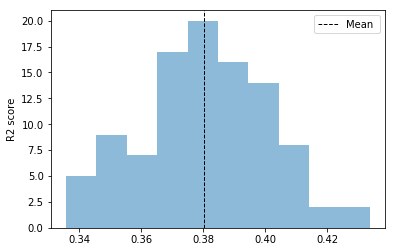

In [158]:
score(X, y, label="")


0.3889396176235032


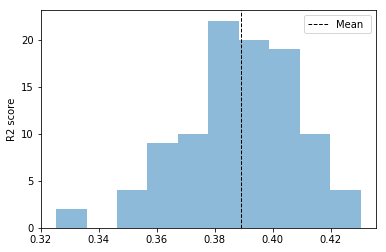

In [91]:
score(X, y, label="")


0.5215607896234403


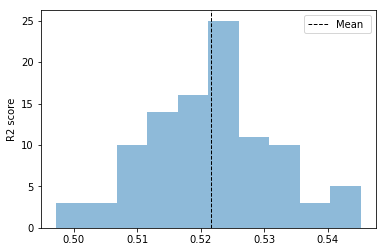

In [93]:
score(X, np.log(y), label="")

## Trends

0.7128287445806073


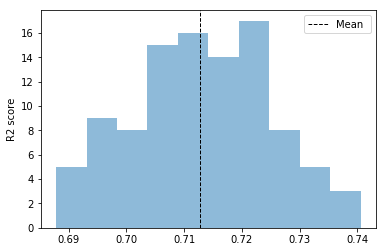

In [206]:
score(X_w_trends_wordstat.drop("title_uais", axis=1), np.log(y_wordstat), "")

0.3092821885719858


0.3234925759031716


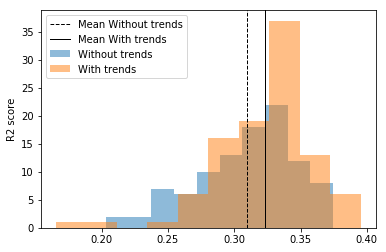

In [97]:
compare_features(X, X_w_trends.drop("title_uais", axis=1), y=y, label1="Without trends", label2="With trends")

0.4340857190528336


0.5016380646079316


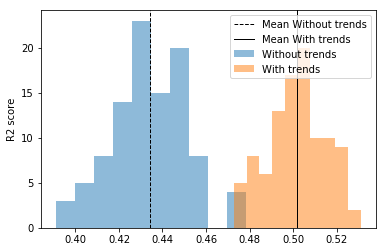

In [101]:
compare_features(X, X_w_trends.drop("title_uais", axis=1), y=np.log(y), label1="Without trends", label2="With trends")

## Scaling and Poly featrures

In [90]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [ ]:
ss = StandardScaler()
compare_features(
    X_w_trends.drop("title_uais", axis=1), 
    ss.fit_transform(X_w_trends.drop("title_uais", axis=1)),
    y=np.log(y), 
    label1="Without trends", label2="With trends"
)

In [102]:
pf = PolynomialFeatures()

In [105]:
pf_features = ["budget"] + \
    list(filter(lambda x: "pr_week" in x, X_w_trends.columns)) + \
    list(filter(lambda x: "num" in x, X_w_trends.columns))

In [114]:
X_poly = np.hstack([
    X_w_trends.drop(pf_features + ["title_uais"], axis=1).values,
    pf.fit_transform(X_w_trends[pf_features])[:, 1:]
])

0.5048133524114464


0.5162469448710238


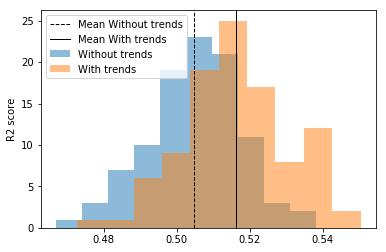

In [117]:
compare_features(
    X_w_trends.drop("title_uais", axis=1), 
    X_poly,
    y=np.log(y), 
    label1="Without trends", label2="With trends"
)

## Classification

In [94]:
for i, j in zip(start, end):
    print(f"{int(i):,} - {int(j):,}")

NameError: name 'start' is not defined

In [95]:
def make_classes(x, n=8):
    start, end = np.vectorize(lambda x: (x[0], x[-1]))(
        np.array_split(np.sort(y), n)
    )
    
    def _make_class(x):
        for cls, (i, j) in enumerate(zip(start, end)):
            if i <= x <= j:
                return cls
        return -1 
    return np.array(list(map(_make_class, x)))

### Macro

In [100]:
scores = np.array([
    cross_val_score(
        LGBMClassifier(), 
        X,  make_classes(y, n=5), 
        cv=KFold(n_splits=5, shuffle=True), 
        scoring=make_scorer(precision_score, average="macro")
    ).mean()
    for _ in tqdm(range(10))
])

0.47650211990656927


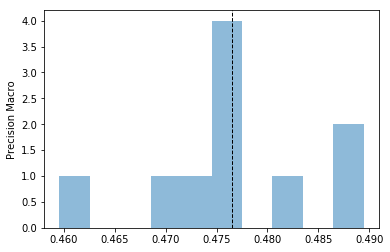

In [101]:
plt.hist(scores, alpha=0.5)
plt.axvline(scores.mean(), color='k', linestyle='dashed', linewidth=1)
plt.ylabel("Precision Macro")
print(scores.mean())

In [137]:
scores = np.array([
    cross_val_score(
        LGBMClassifier(), 
        X_w_trends.drop("title_uais", axis=1),  make_classes(y), 
        cv=KFold(n_splits=5, shuffle=True), 
        scoring=make_scorer(precision_score, average="macro")
    ).mean()
    for _ in tqdm(range(10))
])

NameError: name 'label1' is not defined

0.3314404720593491


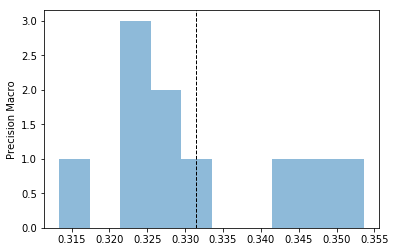

In [138]:
plt.hist(scores, alpha=0.5)
plt.axvline(scores.mean(), color='k', linestyle='dashed', linewidth=1)
plt.ylabel("Precision Macro")
print(scores.mean())

### Micro

In [139]:
scores = np.array([
    cross_val_score(
        LGBMClassifier(), 
        X_w_trends.drop("title_uais", axis=1),  make_classes(y), 
        cv=KFold(n_splits=5, shuffle=True), 
        scoring=make_scorer(precision_score, average="micro")
    ).mean()
    for _ in tqdm(range(10))
])

0.32650668036998975


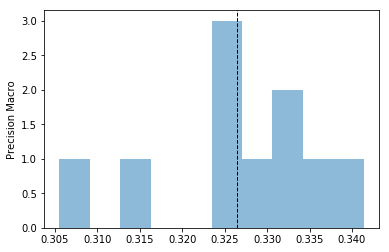

In [140]:
plt.hist(scores, alpha=0.5)
plt.axvline(scores.mean(), color='k', linestyle='dashed', linewidth=1)
plt.ylabel("Precision Micro")
print(scores.mean())

### R2

0.21287173039087307


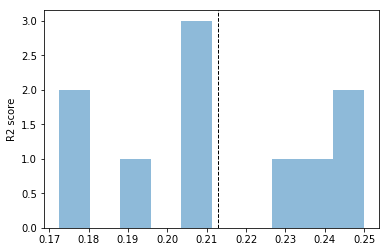

In [141]:
scores = np.array([
    cross_val_score(
        LGBMClassifier(), 
        X_w_trends.drop("title_uais", axis=1),  make_classes(y), 
        cv=KFold(n_splits=5, shuffle=True), 
        scoring=make_scorer(r2_score)
    ).mean()
    for _ in tqdm(range(10))
])
plt.hist(scores, alpha=0.5)
plt.axvline(scores.mean(), color='k', linestyle='dashed', linewidth=1)
plt.ylabel("R2 score")
print(scores.mean())

In [51]:
results = cross_validate(    
    LGBMRegressor(), 
    X, y, 
    cv=KFold(n_splits=5, shuffle=True), 
    scoring=make_scorer(r2_score),
    return_estimator=True
)

In [52]:
np.mean(results["test_score"])

0.3041116301234892

In [53]:
best_model = results["estimator"][np.argmax(results["test_score"])]

In [54]:
y_pred = best_model.predict(X)

In [55]:
import matplotlib.pyplot as plt

In [56]:
%matplotlib inline

In [57]:
x = np.random.choice(np.arange(len(y)), size=100, replace=False)

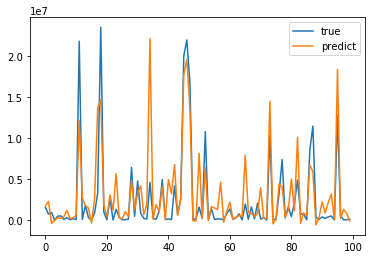

In [58]:
plt.plot(y[x], label="true"),
plt.plot(y_pred[x], label="predict", alpha=1)
plt.legend()
plt.savefig("pics/plot.png")
plt.show()

In [59]:
import scipy

In [60]:
scipy.spatial.distance.cosine(y, y_pred)

0.14596643753276928

In [63]:
scores = cross_val_score(
    LGBMRegressor(), 
    X, np.log(y), 
    cv=KFold(n_splits=5, shuffle=True), 
    scoring=make_scorer(r2_score)
)
scores

array([0.39820468, 0.50533416, 0.35680614, 0.42114436, 0.38293625])

In [64]:
np.clip(scores, 0, 1).mean()

0.4128851198526807